In [1]:
#import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
CombinedDataFrame = pd.read_csv("CombinedDataFrameQuarterlyChangeRating.csv",index_col=["symbol","date"],parse_dates=["date"])

In [2]:
CombinedDataFrame

deferredIncomeTax  stockBasedCompensation  \
symbol date                                                    
CMCSA  2021-06-30             1850.0                  2055.0   
       2021-03-31             1657.0                  2056.0   
       2020-12-31               20.0                  2052.0   
       2020-09-30               45.0                  2054.0   
       2020-06-30             1684.0                  2054.0   
...                              ...                     ...   
ESOA   2020-06-30              949.0                    55.0   
       2020-03-31              860.0                    55.0   
       2019-12-31              740.0                    55.0   
       2019-09-30             1081.0                    55.0   
       2019-06-30              980.0                    55.0   

                   changeInWorkingCapital  accountsReceivables  \
symbol date                                                      
CMCSA  2021-06-30                  3103.0                936.0   
       2021-03-31                  4480.0                936.0   
       2020-12-31                   268.0                936.0   
       2020-09-30                    72.0                936.0   
       2020-06-30                  4552.0                936.0   
...                                   ...                  ...   
ESOA   2020-06-30                  1597.0                383.0   
       2020-03-31                  2751.0               1337.0   
       2019-12-31                  3622.0               1427.0   
       2019-09-30                  2976.0                495.0   
       2019-06-30                  1676.0               1203.0   

                   netCashProvidedByOperatingActivities  acquisitionsNet  \
symbol date                                                                
CMCSA  2021-06-30                                4790.0             66.0   
       2021-03-31                                4791.0             90.0   
       2020-12-31                                4772.0             93.0   
       2020-09-30                                4774.0             57.0   
       2020-06-30                                4796.0            799.0   
...                                                 ...              ...   
ESOA   2020-06-30                                1031.0            615.0   
       2020-03-31                                1222.0            615.0   
       2019-12-31                                2780.0            615.0   
       2019-09-30                                2333.0            615.0   
       2019-06-30                                1568.0            615.0   

                   otherInvestingActivites  commonStockIssued  \
symbol date                                                     
CMCSA  2021-06-30                     42.0              100.0   
       2021-03-31                     46.0              100.0   
       2020-12-31                     34.0              100.0   
       2020-09-30                     38.0              100.0   
       2020-06-30                     43.0              100.0   
...                                    ...                ...   
ESOA   2020-06-30                   2239.0              100.0   
       2020-03-31                   2417.0              100.0   
       2019-12-31                   2420.0              100.0   
       2019-09-30                   2304.0              100.0   
       2019-06-30                   2295.0              100.0   

                   commonStockRepurchased  effectOfForexChangesOnCash  ...  \
symbol date                                                            ...   
CMCSA  2021-06-30                  1085.0                      1613.0  ...   
       2021-03-31                  1085.0                        83.0  ...   
       2020-12-31                  1085.0                       130.0  ...   
       2020-09-30                  1085.0                      1677.0  ...   
       2020-06-30       

In [3]:
CombinedDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 393336 entries, ('CMCSA', Timestamp('2021-06-30 00:00:00')) to ('ESOA', Timestamp('2019-06-30 00:00:00'))
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   deferredIncomeTax                     393336 non-null  float64
 1   stockBasedCompensation                393336 non-null  float64
 2   changeInWorkingCapital                393336 non-null  float64
 3   accountsReceivables                   393336 non-null  float64
 4   netCashProvidedByOperatingActivities  393336 non-null  float64
 5   acquisitionsNet                       393336 non-null  float64
 6   otherInvestingActivites               393336 non-null  float64
 7   commonStockIssued                     393336 non-null  float64
 8   commonStockRepurchased                393336 non-null  float64
 9   effectOfForexChangesOnCash            393336 non-null  flo

## K nearest neighbor classifier

In [4]:
sample = CombinedDataFrame.sample(20000)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample.drop(columns="is_above_market_average"), 
                                                    sample["is_above_market_average"],test_size=0.10, 
                                                    random_state=1)

In [6]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [7]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [8]:
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.svm import SVC, NuSVC, LinearSVC

In [13]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [15]:
from xgboost import XGBClassifier

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# sample = CombinedDataFrame.sample(20000)

## Ensemble Classifications

In [18]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print (f" Accuracy for Random Forest Classifier is {accuracy_score(y_test, rfc_pred)}")

 Accuracy for Random Forest Classifier is 0.5535


In [19]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print (f" Accuracy for AdaBoost is { accuracy_score(y_test, ada_pred)}")

 Accuracy for AdaBoost is 0.5395


In [20]:
# runs slow
bag = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
print (f" Accuracy for Bagging Classifier is { accuracy_score(y_test, bag_pred)}")

 Accuracy for Bagging Classifier is 0.556


In [21]:
xtra = ExtraTreesClassifier(n_estimators=100, random_state=0)
xtra.fit(X_train, y_train)
xtra_pred = xtra.predict(X_test)
print (f" Accuracy for Extra Trees Classifier is { accuracy_score(y_test, xtra_pred)}")

 Accuracy for Extra Trees Classifier is 0.5285


In [22]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print (f" Accuracy for Gradient Boosting Classifier is { accuracy_score(y_test, gbc_pred)}")

 Accuracy for Gradient Boosting Classifier is 0.5335


## Gaussian Process

In [23]:
#idk why doesn't work / slow
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel = kernel, random_state=0)
gpc.fit(X_train, y_train)
gpc_pred = gpc.predict(X_test)
print (f" Accuracy for Gradient Process Classifier is { accuracy_score(y_test, gpc_pred)}")

 Accuracy for Gradient Process Classifier is 0.516


## Linear Models

In [24]:
lrcv = LogisticRegressionCV(cv=5, random_state=0)
lrcv.fit(X_train, y_train)
lrcv_pred = lrcv.predict(X_test)
print (f" Accuracy for Logistic Regression Cross Validation is { accuracy_score(y_test, lrcv_pred)}")

D:\5523\Dev\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\5523\Dev\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

 Accuracy for Logistic Regression Cross Validation is 0.5535


In [25]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
pac.fit(X_train, y_train)
pac_pred = pac.predict(X_test)
print (f" Accuracy for Passive Aggressive Classifier is { accuracy_score(y_test, pac_pred)}")

 Accuracy for Passive Aggressive Classifier is 0.525


In [26]:
ridg = RidgeClassifierCV()
ridg.fit(X_train, y_train)
ridg_pred = ridg.predict(X_test)
print (f" Accuracy for RidgeClassifier is { accuracy_score(y_test, ridg_pred)}")

 Accuracy for RidgeClassifier is 0.5605


In [27]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print (f" Accuracy for SGD Classifier is { accuracy_score(y_test, sgd_pred)}")

 Accuracy for SGD Classifier is 0.538


In [28]:
per = Perceptron(tol = 1e-3, random_state=0)
per.fit(X_train, y_train)
per_pred = per.predict(X_test)
print (f" Accuracy for Perceptron Classifier is { accuracy_score(y_test, per_pred)}")

 Accuracy for Perceptron Classifier is 0.5375


## Naive Bayes

In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print (f" Accuracy for Gassuian Naive Bayes is { accuracy_score(y_test, gnb_pred)}")

 Accuracy for Gassuian Naive Bayes is 0.536


## Neighbors

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print (f" Accuracy for k-nn is {accuracy_score(y_test, knn_pred)}")


 Accuracy for k-nn is 0.512


## SVM

In [31]:
#takes forever
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print (f" Accuracy for SVM is { accuracy_score(y_test, svc_pred)}")

 Accuracy for SVM is 0.5555


In [32]:
nsvc = make_pipeline(StandardScaler(), NuSVC(probability=True))
nsvc.fit(X_train, y_train)
nsvc_pred = nsvc.predict(X_test)
print(f" Accuracy for NuSVC is { accuracy_score(y_test, nsvc_pred)}")

 Accuracy for NuSVC is 0.5315


In [33]:
linsvc = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
linsvc.fit(X_train, y_train)
linsvc_pred = linsvc.predict(X_test)
print(f" Accuracy for LinearSVC is { accuracy_score(y_test, linsvc_pred)}")

 Accuracy for LinearSVC is 0.56


D:\5523\Dev\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Tree

In [34]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print (f" Accuracy for Decision Tree is { accuracy_score(y_test, dtc_pred)}")

 Accuracy for Decision Tree is 0.556


In [35]:
xtrat = ExtraTreeClassifier(random_state=0)
xtrat.fit(X_train, y_train)
xtrat_pred = xtrat.predict(X_test)
print (f" Accuracy for Extra Tree Classifier is { accuracy_score(y_test, xtrat_pred)}")

 Accuracy for Extra Tree Classifier is 0.5005


## Discriminant Analysis

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
print (f" Accuracy for Linear Discriminant Analysis is { accuracy_score(y_test, lda_pred)}")

 Accuracy for Linear Discriminant Analysis is 0.5605


In [37]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print(f" Accuracy for Quadratic Discriminant Analysis is { accuracy_score(y_test, qda_pred)}")

 Accuracy for Quadratic Discriminant Analysis is 0.5325


## XGBoost

In [38]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)
print(f" Accuracy for XGBoost Classifier is { accuracy_score(y_test, xgbc_pred)}")

D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Accuracy for XGBoost Classifier is 0.5305


## Classifier Visualization

In [39]:
Classifier_Init = ['Classifier Name', 'Classifier Accuracy']
ClassifierComp = pd.DataFrame(columns = Classifier_Init)

In [40]:
ClassifierComp.loc[0, 'Classifier Name'] = "RandomForestClassifier"
ClassifierComp.loc[1, 'Classifier Name'] = "XGBClassifier"
ClassifierComp.loc[2, 'Classifier Name'] = "BaggingClassifier"
ClassifierComp.loc[3, 'Classifier Name'] = "DecisionTreeClassifier"
ClassifierComp.loc[4, 'Classifier Name'] = "LogisticRegressionCV"
ClassifierComp.loc[5, 'Classifier Name'] = "AdaBoost"
ClassifierComp.loc[6, 'Classifier Name'] = "SVC"
ClassifierComp.loc[7, 'Classifier Name'] = "RidgeClassifierCV"
ClassifierComp.loc[8, 'Classifier Name'] = "LinearDiscriminantAnalysis"
ClassifierComp.loc[9, 'Classifier Name'] = "LinearSVC"
ClassifierComp.loc[10, 'Classifier Name'] = "GradientBoostingClassifier"
ClassifierComp.loc[11, 'Classifier Name'] = "QuadraticDiscriminantAnalysis"
ClassifierComp.loc[12, 'Classifier Name'] = "ExtraTreesClassifier"
ClassifierComp.loc[13, 'Classifier Name'] = "GaussianNB"
ClassifierComp.loc[14, 'Classifier Name'] = "Neural Net"
ClassifierComp.loc[15, 'Classifier Name'] = "NuSVC"
ClassifierComp.loc[16, 'Classifier Name'] = "SGDClassifier"
ClassifierComp.loc[17, 'Classifier Name'] = "Perceptron"
ClassifierComp.loc[18, 'Classifier Name'] = "KNeighborsClassifier"
ClassifierComp.loc[19, 'Classifier Name'] = "ExtraTreeClassifier"
ClassifierComp.loc[20, 'Classifier Name'] = "GaussianProcessClassifier"
ClassifierComp.loc[21, 'Classifier Name'] = "PassiveAggressiveClassifier"

ClassifierComp.loc[0, 'Classifier Accuracy'] = 0.55
ClassifierComp.loc[1, 'Classifier Accuracy'] = 0.549
ClassifierComp.loc[2, 'Classifier Accuracy'] = 0.547
ClassifierComp.loc[3, 'Classifier Accuracy'] = 0.547
ClassifierComp.loc[4, 'Classifier Accuracy'] = 0.5465
ClassifierComp.loc[5, 'Classifier Accuracy'] = 0.543
ClassifierComp.loc[6, 'Classifier Accuracy'] = 0.543
ClassifierComp.loc[7, 'Classifier Accuracy'] = 0.5425
ClassifierComp.loc[8, 'Classifier Accuracy'] = 0.5425
ClassifierComp.loc[9, 'Classifier Accuracy'] = 0.5425
ClassifierComp.loc[10, 'Classifier Accuracy'] = 0.5345
ClassifierComp.loc[11, 'Classifier Accuracy'] = 0.533
ClassifierComp.loc[12, 'Classifier Accuracy'] = 0.5315
ClassifierComp.loc[13, 'Classifier Accuracy'] = 0.529
ClassifierComp.loc[14, 'Classifier Accuracy'] = 0.528
ClassifierComp.loc[15, 'Classifier Accuracy'] = 0.5275
ClassifierComp.loc[16, 'Classifier Accuracy'] = 0.516
ClassifierComp.loc[17, 'Classifier Accuracy'] = 0.515
ClassifierComp.loc[18, 'Classifier Accuracy'] = 0.5125
ClassifierComp.loc[19, 'Classifier Accuracy'] = 0.5085
ClassifierComp.loc[20, 'Classifier Accuracy'] = 0.501
ClassifierComp.loc[21, 'Classifier Accuracy'] = 0.4995

Text(0, 0.5, 'Classifier')

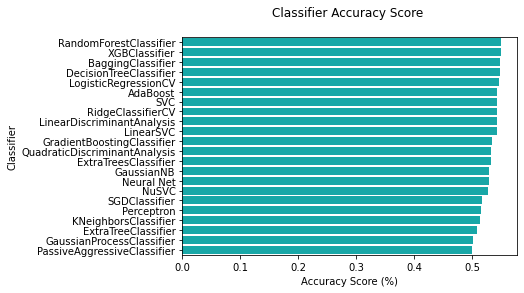

In [41]:
sns.barplot(x ='Classifier Accuracy', y = 'Classifier Name', data = ClassifierComp, color = 'c')
plt.title('Classifier Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Classifier')

# He said we really need to dig down into our accuracies and analyze them

In [42]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [43]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print (f" Accuracy for Neural Net is { accuracy_score(y_test, mlp_pred)}")

 Accuracy for Neural Net is 0.513


In [44]:
#extra sample call
sample = CombinedDataFrame.sample(200)

## Decision Tree Classifier Hyper-Parameter Tuning Model

In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
#models to add:
#BaggingClassifier(slow), RidgeClassifier
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_depth': [1,2,4,6,8,10,20],
            'criterion': ['gini','entropy'],
            'n_estimators': [1,5,10,100]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'booster': ['gbtree', 'gblinear', 'dart']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [1,2,4,6,8,10,20]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'adaboost': {
        'model': AdaBoostClassifier(n_estimators=100, random_state=0),
        'params': {
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'gradient_boost': {
        'model': GradientBoostingClassifier(n_estimators =100, random_state=0),
        'params': {
            'max_depth': [1,2,4,6,10],
            'learning_rate': [0.1, 1.0]
        }
    },
    'extra_trees': {
        'model': ExtraTreesClassifier(random_state=0),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [1,2,4,6,8,10,20],
            'max_features': ['sqrt', 'log2']
        }
    }
}
    

In [47]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(sample.drop(columns="is_above_market_average"), sample["is_above_market_average"])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is depre

[02:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is depre

[02:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\5523\Dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,best_score,best_params
0,random_forest,0.610,"{'criterion': 'gini', 'max_depth': 2, 'n_estim..."
1,XGBoost,0.575,{'booster': 'gblinear'}
2,decision_tree,0.550,"{'criterion': 'entropy', 'max_depth': 10}"
3,logistic_regression,0.600,{'C': 1}
4,adaboost,0.580,{}
5,svm,0.605,"{'C': 1, 'kernel': 'linear'}"
6,gradient_boost,0.625,"{'learning_rate': 1.0, 'max_depth': 1}"
7,extra_trees,0.590,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
